## 앙상블 기법
* 무작위로 선택된 수천명의 사람들에게 복잡하거나 어려운 질문을 하고 대답을 모은다고 가정
* 이렇게 모아진 답은 한명의 전문가의 답보다 나을 수 있음
     + 집단지성, 대중의 지혜
* 이처럼 일련의 분석기/예측기로 부터 예측을 수집하면 가장 좋은 하나의 모델보다 더 좋은 예측을 얻을 수 있음
     + 일련의 분석기/예측기 => 앙상블
     + 앙상블을 통해 학습 => 앙상블 학습
     + 앙상블 학습 알고리즘 => 보팅, 베깅, 부스팅, 스태킹
* 머신러닝 경진대회(kaggle, 공모전)에서 우승하고 싶다면?
     + => 여러 앙상블 방법을 이용!

## 투표기반 분류기votting
* 정확도가 좋은 분류기 여러개를 이용해서 학습시킴
     + => 로지스틱/SVM/랜덤포레스트/K최근접이웃 등등
* 각 분류기로 부터 예측을 모아 가장 많이 선택된
  클래스를 예측함 => 큰수의 법칙
    + 하드보팅   : 다수결 투표로 결정함, 직접투표분류기
    + 소프트보팅 : 확률의 총합으로 결정, 간접투표분류기

In [17]:
from load_ds_module import *

### 테스트용 데이터 생성 및 분할

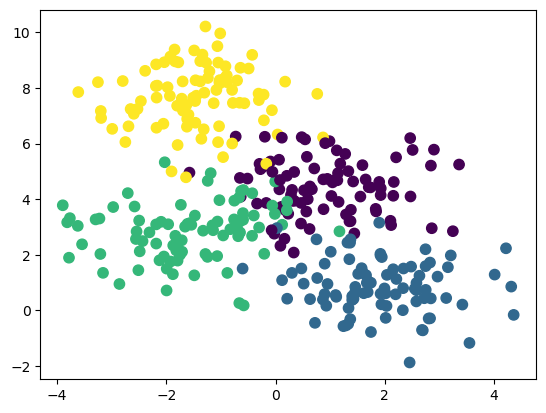

In [2]:
X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=0.75,
                       stratify=y, random_state=2309270955)

## 투표 분류기 생성 1
* 직접투표hard votting : 모든 분류기가 클래스를 예측해서
* 개별 분류기의 최빈값을 계산하고 빈도값이 가장 높은 클래스를 예측

In [4]:
lrclf = LogisticRegression()     # 로지스틱 회귀
dtclf = DecisionTreeClassifier() # 의사결정 트리
svclf = SVC()                    # 서포트 벡터 머신

In [5]:
# voting : 투표방식 지정(soft/hard)
# estimators : 투표분류기에 사용할 분류기 지정
voteclf = VotingClassifier(voting='hard',
                          estimators=[('lr', lrclf), ('dt', dtclf), ('svm', svclf)])

### 개별 분류기 성능 비교 1

In [6]:
for clf in (lrclf, dtclf, svclf, voteclf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_train, y_train))

LogisticRegression 0.9122137404580153
DecisionTreeClassifier 1.0
SVC 0.9045801526717557
VotingClassifier 0.9198473282442748


### 개별 분류기 성능 비교 2

In [7]:
for clf in (lrclf, dtclf, svclf, voteclf):
    pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, pred))

LogisticRegression 0.9204545454545454
DecisionTreeClassifier 0.875
SVC 0.9318181818181818
VotingClassifier 0.9204545454545454


### 결정 영역 시각화

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


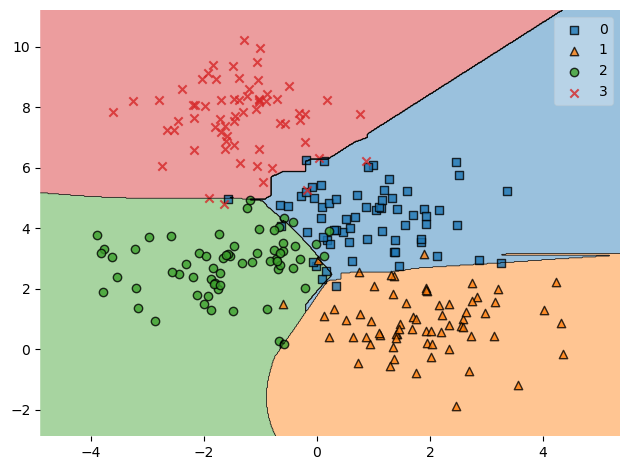

In [8]:
plot_decision_regions(X_train, y_train, voteclf)
plt.tight_layout()

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


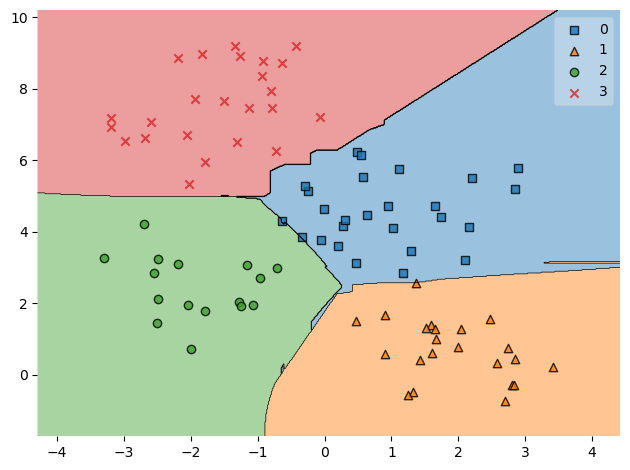

In [9]:
plot_decision_regions(X_test, pred, voteclf)
plt.tight_layout()

## 투표 분류기 생성 2
* 간접투표soft votting : 모든 분류기가 클래스의 확률을 예측해서
* 개별 분류기의 평균을 내어 확률이 가장 높은 클래스를 예측

In [10]:
lrclf = LogisticRegression()     # 로지스틱 회귀
dtclf = DecisionTreeClassifier() # 의사결정 트리
svclf = SVC(probability=True)    # 서포트 벡터 머신

In [11]:
voteclf = VotingClassifier(voting='soft',
                          estimators=[('lr', lrclf), ('dt', dtclf), ('svm', svclf)])

In [12]:
for clf in (lrclf, dtclf, svclf, voteclf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_train, y_train))

LogisticRegression 0.9122137404580153
DecisionTreeClassifier 1.0
SVC 0.9045801526717557
VotingClassifier 0.9809160305343512


In [13]:
for clf in (lrclf, dtclf, svclf, voteclf):
    pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, pred))

LogisticRegression 0.9204545454545454
DecisionTreeClassifier 0.8863636363636364
SVC 0.9318181818181818
VotingClassifier 0.8863636363636364


/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


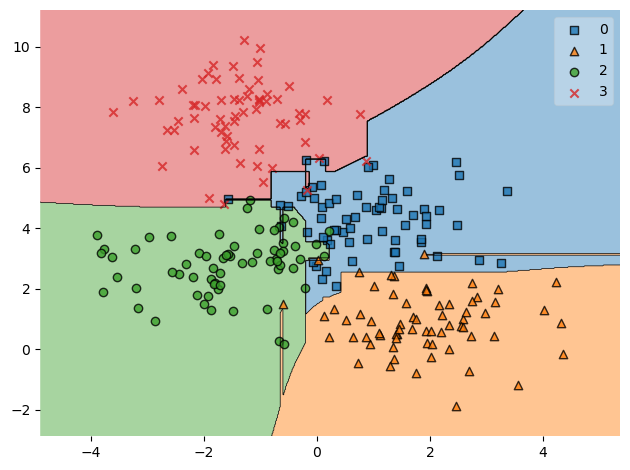

In [14]:
plot_decision_regions(X_train, y_train, voteclf)
plt.tight_layout()

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


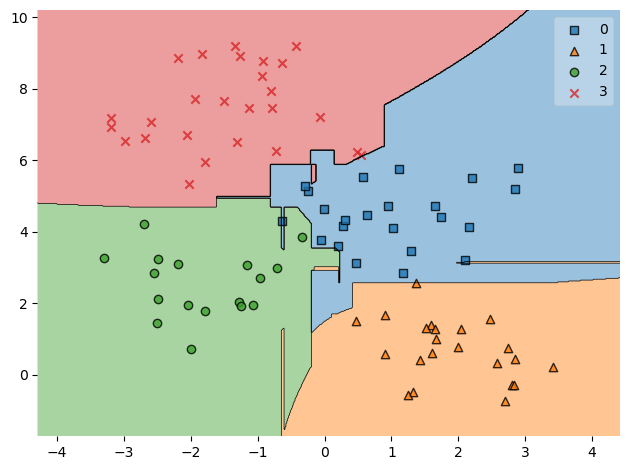

In [15]:
plot_decision_regions(X_test, pred, voteclf)
plt.tight_layout()

### iris 데이터를 hard voting 분류기로 분석

In [21]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
data = iris.data
target = iris.target

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=0.75,
                       stratify=y, random_state=2309270955)

In [26]:
lrclf = LogisticRegression()     # 로지스틱 회귀
dtclf = DecisionTreeClassifier() # 의사결정 트리
svclf = SVC()                    # 서포트 벡터 머신

In [27]:
voteclf = VotingClassifier(voting='hard',
                          estimators=[('lr', lrclf), ('dt', dtclf), ('svm', svclf)])

In [28]:
for clf in (lrclf, dtclf, svclf, voteclf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_train, y_train))

LogisticRegression 0.9122137404580153
DecisionTreeClassifier 1.0
SVC 0.9045801526717557
VotingClassifier 0.9198473282442748


In [29]:
for clf in (lrclf, dtclf, svclf, voteclf):
    pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, pred))

LogisticRegression 0.9204545454545454
DecisionTreeClassifier 0.8863636363636364
SVC 0.9318181818181818
VotingClassifier 0.9204545454545454


/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


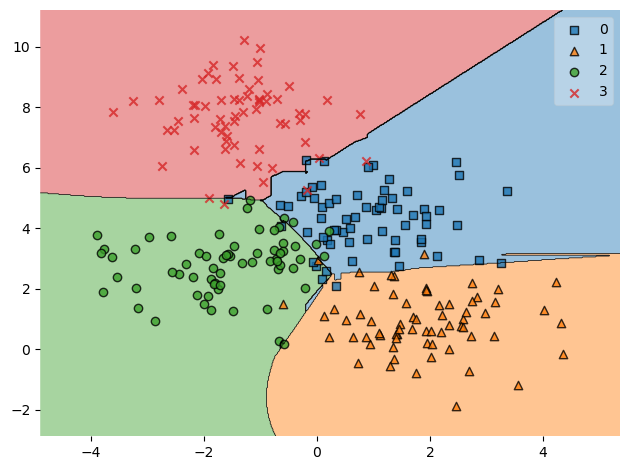

In [30]:
plot_decision_regions(X_train, y_train, voteclf)
plt.tight_layout()

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


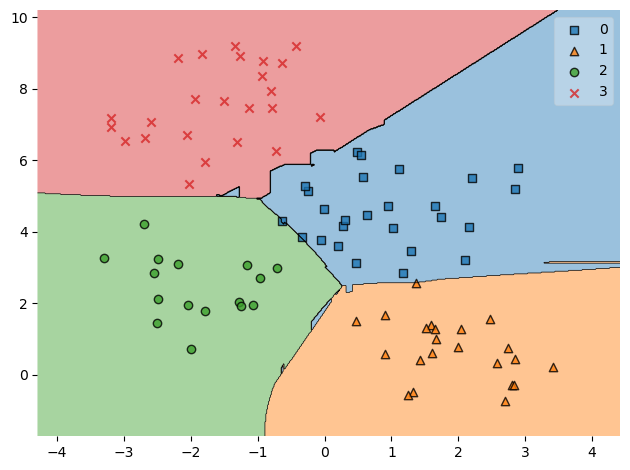

In [31]:
plot_decision_regions(X_test, pred, voteclf)
plt.tight_layout()

### iris 데이터를 soft voting 분류기로 분석

In [32]:
lrclf = LogisticRegression()     # 로지스틱 회귀
dtclf = DecisionTreeClassifier() # 의사결정 트리
svclf = SVC(probability=True)    # 서포트 벡터 머신

In [33]:
voteclf = VotingClassifier(voting='soft',
                          estimators=[('lr', lrclf), ('dt', dtclf), ('svm', svclf)])

In [34]:
for clf in (lrclf, dtclf, svclf, voteclf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_train, y_train))

LogisticRegression 0.9122137404580153
DecisionTreeClassifier 1.0
SVC 0.9045801526717557
VotingClassifier 0.9809160305343512


In [35]:
for clf in (lrclf, dtclf, svclf, voteclf):
    pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, pred))

LogisticRegression 0.9204545454545454
DecisionTreeClassifier 0.875
SVC 0.9318181818181818
VotingClassifier 0.8863636363636364


/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


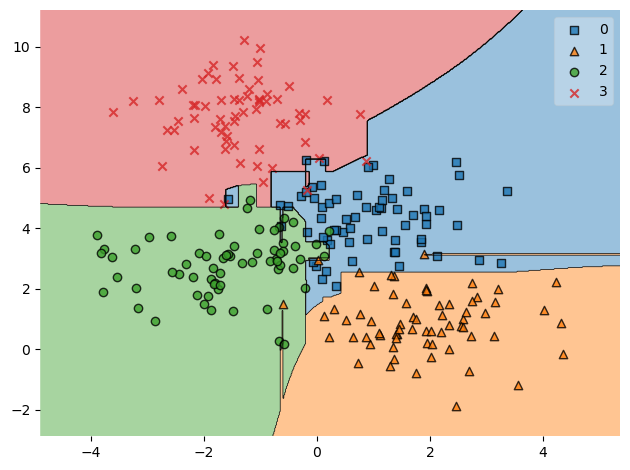

In [36]:
plot_decision_regions(X_train, y_train, voteclf)
plt.tight_layout()

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


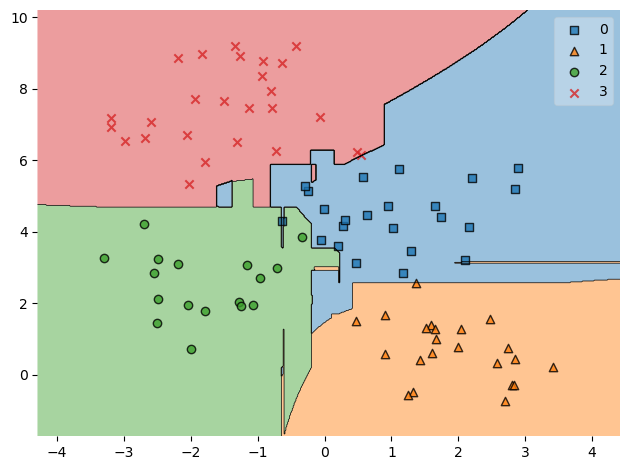

In [37]:
plot_decision_regions(X_test, pred, voteclf)
plt.tight_layout()